## **Design and Discovery of Magnesium Alloys**
A combination of light weight, high specific strength, and good castability makes magnesium alloys a promising engineering material for the automotive and aerospace industries. Vehicle weight reduction is one of the major means available to improve automotive fuel efficiency. High-strength steels, Aluminium (Al), and polymers are already being used to reduce weight significantly, but substantial additional reductions could be achieved by greater use of low-density magnesium (Mg) and its alloys. This project herein therefore relies on the use of machine learning, to assist in the development of A.I.  to predict alloy compositions that are potentially useful for future metallic alloys. This study shows how a machine learning approach, is able to offer acceptable precision predictions with respect to the main mechanical properties of metals.





In [96]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.multioutput import MultiOutputRegressor
import xgboost as xgb
from scipy.special import softmax
import random
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers
import tensorflow as tf
!pip install git+https://github.com/tensorflow/docs
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-cmylkhof
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-cmylkhof
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0f0bca28a9f983f9d830754ab26f8e75c4bee13aa_-cp36-none-any.whl size=114628 sha256=9cf037882abfafac8c064627acab77bafa01714aad7c998e9565f90b82a4905c
  Stored in directory: /tmp/pip-ephem-wheel-cache-fb1frmop/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import seaborn as sns

## Pre-Processing Data

In [0]:
data = pd.read_excel('Latest.xlsx')
data = pd.DataFrame(data)
working_data = data.drop(['Name','Condition'],axis=1)
working_data=working_data[working_data['Mg']>80]

In [0]:
!unzip -uq "/content/drive/My Drive/Latest.zip" -d "/content/"


## **Visualization of Dataset**

In [100]:
working_data

,Condition(Numeric),Mg,Al,Zn,Mn,Ce,La,Nd,Pr,Sn,Ca,Zr,Ag,Ho,Y,Gd,Cu,Si,Li,Yb,Th,Sb,Ga,Tb,Dy,Fe,UTS,YS,Ductility
0,1,93.000,0.00,6.000,0.000,0.00,0.00,0.00,0.000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,280.0,200.0,15.00
1,1,96.900,0.00,2.700,0.000,0.00,0.00,0.00,0.000,0.0,0.0,0.0,0.0,1.4,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,208.0,300.0,20.00
2,1,92.230,6.76,0.740,0.220,0.00,0.00,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004,0.043,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,297.0,319.0,18.00
3,1,90.663,8.40,0.600,0.300,0.00,0.00,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003,0.030,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,329.0,333.0,13.00
4,1,96.280,2.80,0.600,0.320,0.00,0.00,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,279.0,301.0,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,1,90.270,5.07,0.496,0.132,1.68,1.23,0.99,0.112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,160.0,72.0,5.85
605,1,87.239,5.28,0.584,0.120,2.90,2.67,1.66,0.186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,156.0,84.0,5.60
606,4,93.400,4.00,0.000,0.200,0.80,0.80,0.80,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,234.0,145.0,11.00
607,3,90.000,9.20,0.300,0.100,0.00,0.00,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100,0.300,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,275.0,150.0,1.00


## **Correlation between Mg, Al , Zinc and their mechnanical properties**

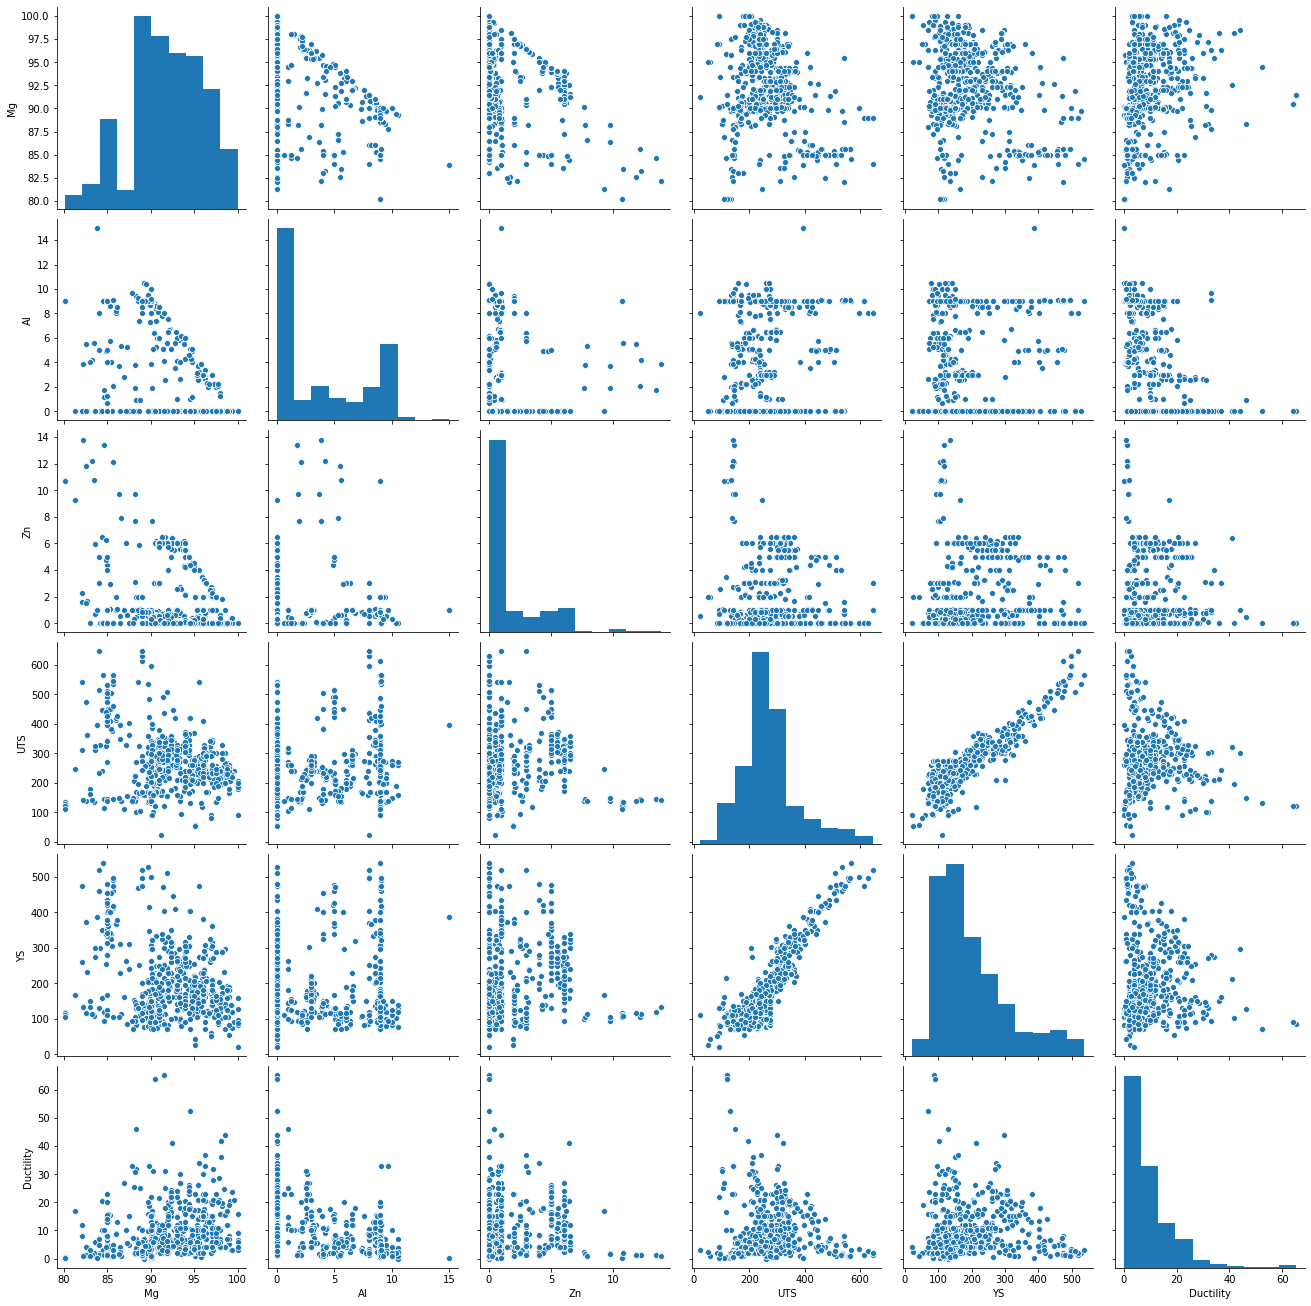

In [101]:
Corr= sns.pairplot(working_data, height=3,
                 vars=["Mg", "Al","Zn","UTS","YS","Ductility"])

##**Feature Selection of Dataset**
# Since our dataset has 3 columns that we need to predict for our first task, we divide those 3 columns into 3 different features

In [0]:
# For training with Support vector Regressor
X = working_data.iloc[:,:26]
y_UTS=working_data.iloc[:,26]
y_YS=working_data.iloc[:,27]
y_Duct=working_data.iloc[:,28]

## **Splitting our dataset into Train and Test Sets**

In [0]:
X_train_UTS,X_test_UTS,y_train_UTS,y_test_UTS = train_test_split(X,y_UTS, test_size = 0.05,random_state =1)
X_train_YS,X_test_YS,y_train_YS,y_test_YS = train_test_split(X,y_YS, test_size = 0.05,random_state =6)
X_train_Duct,X_test_Duct,y_train_Duct,y_test_Duct = train_test_split(X,y_Duct, test_size = 0.05,random_state =4345)

## **Training set input Features**

In [104]:
X_train_UTS

,Condition(Numeric),Mg,Al,Zn,Mn,Ce,La,Nd,Pr,Sn,Ca,Zr,Ag,Ho,Y,Gd,Cu,Si,Li,Yb,Th,Sb,Ga,Tb,Dy,Fe
314,1,85.60,9.10,0.00,0.00,0.0,0.0,0.0,0.0,0.0,5.30,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0,0.0,0.0,0.0
122,1,94.35,0.00,5.00,0.10,0.0,0.0,0.0,0.0,0.0,0.25,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0,0.0,0.0,0.0
252,1,89.80,9.00,1.00,0.20,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0,0.0,0.0,0.0
113,1,96.30,0.00,3.00,0.00,0.0,0.0,0.0,0.0,0.0,0.20,0.00,0.0,0.0,0.5,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0,0.0,0.0,0.0
303,1,93.90,0.00,5.54,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.56,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,1,92.35,0.00,5.00,0.10,0.0,0.0,0.0,0.0,0.0,0.25,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2.0,0.0,0.0,0,0.0,0.0,0.0
146,4,90.35,6.40,3.00,0.25,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0,0.0,0.0,0.0
74,1,95.40,2.52,0.76,0.39,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.93,0.0,0.0,0.0,0,0.0,0.0,0.0
237,1,93.20,0.00,6.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.80,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0,0.0,0.0,0.0


# **Output Features**

In [105]:
output_features = np.vstack((y_train_UTS,y_train_YS,y_train_Duct))
output_features = pd.DataFrame(output_features.T)
output_features.columns = ['UTS','YS','Ductility']
output_features

,UTS,YS,Ductility
0,459.0,95.0,15.0
1,320.0,117.0,2.2
2,422.0,200.0,17.5
3,244.2,117.5,5.0
4,371.0,150.0,21.0
...,...,...,...
566,345.0,476.0,11.0
567,190.0,322.0,2.0
568,243.0,114.0,23.0
569,285.0,405.0,2.1


##**Baseline algorithm test**
There are a few regression algorithms I can use. I prefer to line the usable regression algorithms up and run them using a standard set of data. I check the r2 of each run. The given data set is broken down into training set and testing set.Since are dataset is small ,  The test set is 5% of the provided data set.The following cell is runing all regression models for **UTS(Ultimate Tensile Strength)**.



In [106]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))

results = []
names = []
final_UTS = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, X_train_UTS, y_train_UTS, cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(name)
    final_UTS.append(cv_results.mean())
    Scores= "%s: %f " % (name, cv_results.mean())
    print("Model name  R2 _mean Score ")
    print(Scores)


Model name  R2 _mean Score 
ScaledLR: 0.447526 
Model name  R2 _mean Score 
ScaledLASSO: 0.449540 
Model name  R2 _mean Score 
ScaledEN: 0.432727 
Model name  R2 _mean Score 
ScaledKNN: 0.675539 
Model name  R2 _mean Score 
ScaledCART: 0.524634 
Model name  R2 _mean Score 
ScaledGBM: 0.706384 


The following cell is runing all regression models for **YS(Yield Strength)**.

In [107]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))

results = []
names = []
final_YS = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, X_train_YS, y_train_YS, cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(name)
    final_YS.append(cv_results.mean())
    Scores= "%s: %f " % (name, cv_results.mean())
    print("Model name  R2 _mean Score ")
    print(Scores)

Model name  R2 _mean Score 
ScaledLR: 0.512244 
Model name  R2 _mean Score 
ScaledLASSO: 0.521191 
Model name  R2 _mean Score 
ScaledEN: 0.489250 
Model name  R2 _mean Score 
ScaledKNN: 0.712552 
Model name  R2 _mean Score 
ScaledCART: 0.598446 
Model name  R2 _mean Score 
ScaledGBM: 0.702745 


The following cell is runing all regression models for **Ductility**.

In [108]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))

results = []
names = []
final_Duct=[]
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, X_train_Duct, y_train_Duct, cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(name)
    final_Duct.append(cv_results.mean())
    Scores= "%s: %f " % (name, cv_results.mean())
    print("Model name  R2 _mean Score ")
    print(Scores)

Model name  R2 _mean Score 
ScaledLR: 0.350570 
Model name  R2 _mean Score 
ScaledLASSO: 0.295444 
Model name  R2 _mean Score 
ScaledEN: 0.302980 
Model name  R2 _mean Score 
ScaledKNN: 0.482379 
Model name  R2 _mean Score 
ScaledCART: 0.298670 
Model name  R2 _mean Score 
ScaledGBM: 0.538268 


###**Plotting Accuracy obtained from all regresion models**

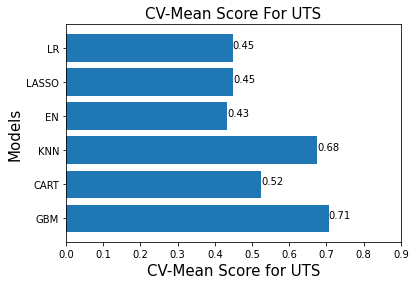

In [109]:
#plotting scores for UTS
fig,ax = plt.subplots()
people = ('LR', 'LASSO', 'EN', 'KNN', 'CART', 'GBM')
y_pos = np.arange(len(people))
performance = final_UTS
for index, value in enumerate(performance):
    plt.text(value, index, str("{:.2f}".format(value)))
ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('CV-Mean Score for UTS',fontsize = 15)
ax.set_title('CV-Mean Score For UTS',fontsize = 15)
ax.set_ylabel('Models',fontsize = 15)
ax.set_xlim(0,0.9)
plt.savefig('CV.png')
plt.show()


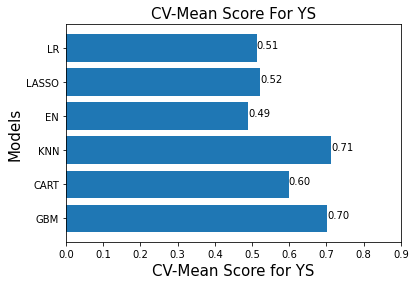

In [110]:
#plotting scores for YS
fig,ax = plt.subplots()
people = ('LR', 'LASSO', 'EN', 'KNN', 'CART', 'GBM')
y_pos = np.arange(len(people))
performance = final_YS
for index, value in enumerate(performance):
    plt.text(value, index, str("{:.2f}".format(value)))
ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('CV-Mean Score for YS',fontsize = 15)
ax.set_title('CV-Mean Score For YS',fontsize = 15)
ax.set_ylabel('Models',fontsize = 15)
ax.set_xlim(0,0.9)
plt.savefig('CV_YS.png')
plt.show()

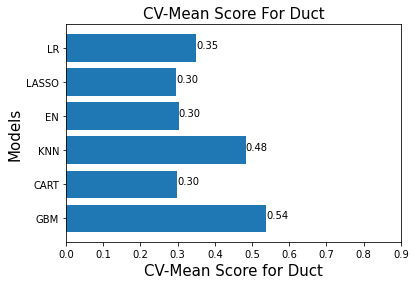

In [111]:
# plotting scores for Ductility
fig,ax = plt.subplots()
people = ('LR', 'LASSO', 'EN', 'KNN', 'CART', 'GBM')
y_pos = np.arange(len(people))
performance = final_Duct
for index, value in enumerate(performance):
    plt.text(value, index, str("{:.2f}".format(value)))
ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('CV-Mean Score for Duct',fontsize = 15)
ax.set_title('CV-Mean Score For Duct',fontsize = 15)
ax.set_ylabel('Models',fontsize = 15)
ax.set_xlim(0,0.9)
plt.savefig('CV_Duct.png')
plt.show()

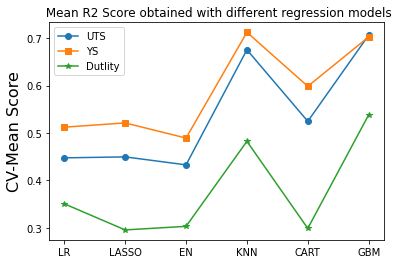

In [112]:
fig,ax =plt.subplots()
ax.plot(final_UTS,marker = 'o')
ax.plot(final_YS,marker = 's')
ax.plot(final_Duct,marker = '*')
ax.set_xticks(np.arange(6))
plt.ylabel("CV-Mean Score",fontsize =16)
ax.set_xticklabels(['LR', 'LASSO', 'EN', 'KNN', 'CART', 'GBM'])
plt.legend(['UTS','YS','Dutlity'])
plt.title(" Mean R2 Score obtained with different regression models",fontsize =12)
plt.savefig("R2 score with differet regression models.png")

##**Performing GridSearchCv on The Gradient Boosting Model to obtain the best paramters**
From the output above, it looks like the Gradient Boosting Regressor operforms the best using a scaled version of the data. From this point onward, I will build the regression algorithm using the Gradient Boosting Regressor. The GBM will be tested with a few n_estimators using the GridSearchCV function. 

In [113]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler().fit(X_train_UTS)
rescaledX = scaler.transform(X_train_UTS)
param_grid = dict(n_estimators=np.array([50,100,200,300,400]))
model = GradientBoostingRegressor(random_state=21)
kfold = KFold(n_splits=10, random_state=21)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=kfold)
grid_result = grid.fit(rescaledX, y_train_UTS)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

0.676523 (0.092575) with: {'n_estimators': 50}
0.706964 (0.094003) with: {'n_estimators': 100}
0.727260 (0.097972) with: {'n_estimators': 200}
0.733930 (0.099501) with: {'n_estimators': 300}
0.732793 (0.100110) with: {'n_estimators': 400}
Best: 0.733930 using {'n_estimators': 300}


# **Accuracy of our best GBM model on the test set**

In [114]:
from sklearn.metrics import mean_squared_error

scaler = StandardScaler().fit(X_train_UTS)
rescaled_X_train = scaler.transform(X_train_UTS)
model_1= GradientBoostingRegressor(random_state=21, n_estimators=100)
model_1.fit(rescaled_X_train, y_train_UTS)

scaler = StandardScaler().fit(X_train_YS)
rescaled_X_train = scaler.transform(X_train_YS)
model_2 = GradientBoostingRegressor(random_state=21, n_estimators=100)
model_2.fit(rescaled_X_train, y_train_YS)

scaler = StandardScaler().fit(X_train_Duct)
rescaled_X_train = scaler.transform(X_train_Duct)
model_3 = GradientBoostingRegressor(random_state=21, n_estimators=100)
model_3.fit(rescaled_X_train, y_train_Duct)
# transform the test dataset
rescaled_X_test_UTS = scaler.transform(X_test_UTS)
rescaled_X_test_YS = scaler.transform(X_test_YS)
rescaled_X_test_Duct = scaler.transform(X_test_Duct)

predictions_1 = model_1.predict(rescaled_X_test_UTS)
predictions_2 = model_2.predict(rescaled_X_test_YS)
predictions_3 = model_3.predict(rescaled_X_test_Duct)

print ("R2 score of UTS :",r2_score(y_test_UTS, predictions_1))
print ("R2 score of YS :",r2_score(y_test_YS, predictions_2))
print ("R2 score of Duct:",r2_score(y_test_Duct, predictions_3))

R2 score of UTS : 0.835368431756734
R2 score of YS : 0.7726230750535457
R2 score of Duct: 0.8440260955417813


##**PERFORMING REGRESSION USING NEURAL NET**
We have attained a decent amount of acccuracy using GradientBoostingModel, so from now we will try neural networks to see if it outperforms the GBM model.

In [0]:
# Creating neural Net
#Preprocessing for neural net

nueral_working_data = working_data
X = nueral_working_data.iloc[:,:26]
Y = nueral_working_data.iloc[:,26:]

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
xscale=scaler_x.fit_transform(X)
yscale=scaler_y.fit_transform(Y)


# **Including all the 3 output feature as our target feature**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale,random_state =0 ,test_size = 0.1)

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(26, activation='relu', input_dim = (X_train.shape[1])),

    layers.Dense(18, activation='relu'),

    layers.Dense(18, activation='relu'),

    layers.Dense(3, activation='linear')
  ])

  #opt = keras.optimizers.Adam(learning_rate=0.0001)
  opt = keras.optimizers.Nadam(learning_rate=0.0001, beta_1=0.999, beta_2=0.999)
  #opt = keras.optimizers.Nadam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
  #opt = keras.optimizers.Adagrad(learning_rate=0.01)

  model.compile(loss='mse',
                optimizer=opt,
                metrics=['mae', 'mse'])
  return model

In [0]:
model = build_model()

In [119]:
EPOCHS = 1000
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop,tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.1387,  mae:0.3191,  mse:0.1387,  val_loss:0.1517,  val_mae:0.3342,  val_mse:0.1517,  
....................................................................................................
Epoch: 100, loss:0.0166,  mae:0.0993,  mse:0.0166,  val_loss:0.0216,  val_mae:0.1096,  val_mse:0.0216,  
....................................................................................................
Epoch: 200, loss:0.0111,  mae:0.0764,  mse:0.0111,  val_loss:0.0152,  val_mae:0.0855,  val_mse:0.0152,  
....................................................................................................
Epoch: 300, loss:0.0091,  mae:0.0688,  mse:0.0091,  val_loss:0.0129,  val_mae:0.0760,  val_mse:0.0129,  
....................................................................................................
Epoch: 400, loss:0.0080,  mae:0.0641,  mse:0.0080,  val_loss:0.0124,  val_mae:0.0728,  val_mse:0.0124,  
........................................................................

In [120]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.005424,0.052081,0.005424,0.011351,0.070289,0.011351,995
996,0.005423,0.052077,0.005423,0.011348,0.070288,0.011348,996
997,0.005420,0.052054,0.005420,0.011346,0.070289,0.011346,997
998,0.005417,0.052042,0.005417,0.011345,0.070289,0.011345,998
999,0.005415,0.052034,0.005415,0.011345,0.070288,0.011345,999


In [121]:
loss, mae, mse = model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.0169 - mae: 0.0903 - mse: 0.0169


In [0]:
test_predictions = model.predict(X_test)

In [122]:
NN_score = r2_score(y_test,test_predictions)
print(NN_score)

0.487188789233257


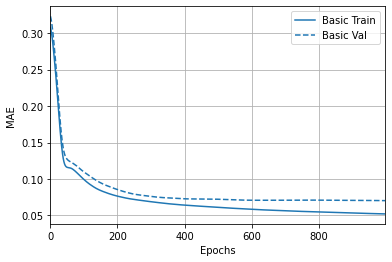

In [123]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

plotter.plot({'Basic': history}, metric = "mae")
plt.ylabel('MAE ')
plt.savefig("MAE_loss_with_early.png")

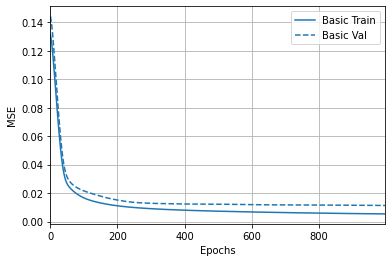

In [124]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylabel('MSE')
plt.savefig('MSE_loss_with_early.png')

##**Plotting prediction error of our model on the test set.**
We can see that our mdoel does relatively well on the test as the bulk of the points indicate 0 errors, but fails to outperform the GBM model 

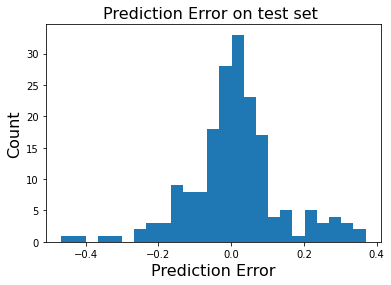

In [125]:
test_predictions = model.predict(X_test)
error = test_predictions.flatten() - y_test.flatten()
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error",fontsize =16)
_ = plt.ylabel("Count",fontsize =16)
plt.title("Prediction Error on test set ", fontsize =16)
plt.savefig("Prediction Error Nueral Net.png")


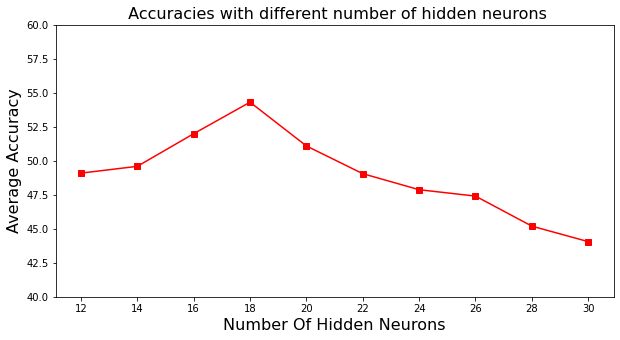

In [0]:
fig = plt.figure(figsize =(10,5))
Hidden = [12,14,16,18,20,22,24,26,28,30]
Accuracies =[ 49.1 ,49.6 , 52.00 , 54.32, 51.1 ,49.06 , 47.88,47.41 , 45.2,44.06]
plt.plot( Hidden,Accuracies,linestyle='-', marker='s', color='r',)
plt.ylim(40,60)
plt.xticks(np.arange(12,32,2))
plt.ylabel('Average Accuracy',fontsize =16)
plt.xlabel("Number Of Hidden Neurons",fontsize =16)
plt.title(" Accuracies with different number of hidden neurons",fontsize =16)
plt.savefig("Accuracy with number of hidden neurons.png")

#**Another regression technique known as XGBoost Regressor**
XGBoost regreessor is said to provide good predictions when the dataset is sparse and relatively samll in number .Since we have sparse data and around 600 samples lets see if XGBoost regressoe outperforms GBM Model. 

In [126]:
# XGBoostRegressor

model_UTS = xgb.XGBRegressor(max_depth =15)
model_UTS.fit(X_train_UTS,y_train_UTS)

model_YS = xgb.XGBRegressor(max_depth=4,n_estimators =200,colsample_bytree =0.8)
model_YS.fit(X_train_YS,y_train_YS)

model_Duct = xgb.XGBRegressor(max_depth =18,colsample_bytree=0.8)
model_Duct.fit(X_train_Duct,y_train_Duct)


[04:01:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:01:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:01:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=18, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
xgb_pred_UTS = model_UTS.predict(X_test_UTS)
xgb_pred_YS = model_YS.predict(X_test_YS)
xgb_pred_Duct = model_Duct.predict(X_test_Duct)

In [0]:
XGB_UTS_score = r2_score(xgb_pred_UTS,y_test_UTS)
XGB_YS_score=r2_score(xgb_pred_YS,y_test_YS)
XGB_Duct_score=r2_score(xgb_pred_Duct,y_test_Duct)
XGB_mean =(XGB_UTS_score+XGB_YS_score+XGB_Duct_score)/3

##**Plotting Accuracies obtained wih different models**
We can see that, indeed the XGBoost model outpeforms both the neural net and Gradient Boosting model.

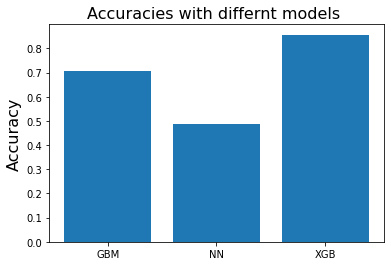

In [129]:
#Avg Accuracies btained with different models
x = ['GBM','NN','XGB']
y = [final_UTS[5],NN_score,XGB_mean]
plt.bar(x,y)
plt.ylabel("Accuracy",fontsize =16)
plt.title("Accuracies with differnt models ",fontsize=16)
plt.savefig("GBM,NN,XGB.png")

##**Now we have obtained a model that can predict mechanical properties with decent amount of accuracy . But we want an alloy composition that can be used in automotive industries.**
We know will create or generate more data like our training samples and use our trained model to predict these generated data's mechanical properties.The predicted properties should be ideal  so as to acheive our goal. So using randomly generated data and using synthetic data we try to solve the problem in hand. 

In [0]:
#
# Seeting elements Max range so that the generated data doesnt exceed the range of maximum solubility.
# This numbers were calcualted by the following techniques:
# For soluble metals :  MAx  range = 1.5*x(x being there solubility)
# For insoluble metals : Max range : 0-0.1
# exception of Lithium(Li) that can have a max range of  15%
Mg = 99
Al = 18.9
Zn = 9.315
Mn=3.33
Ce = 0.345
La = 1.1
Nd = 5.4
Pr = 0.78
Sn=21.75
Ca = 2.025
Zr =4.035
Ag = 22.5
Ho=39.48
Y =18.705
Gd = 35.2
Cu=0.1
Si=0.1
Li=15
Yb = 11.94
Th=7.125
Sb = 0.1
Ga=12.6
Tb=36
Dy=38.01
Fe = 0.1

In [0]:
Mg_c = random.uniform(85,Mg)
Al_c = random.uniform(0,Al)
Zn_c = random.uniform(0,Zn)
Mn_c = random.uniform(0,Mn)
Ce_c = random.uniform(0,Ce)
La_c = random.uniform(0,La)
Nd_c = random.uniform(0,Nd)
Pr_c = random.uniform(0,Pr)
Sn_c = random.uniform(0,Sn)
Ca_c = random.uniform(0,Ca)
Zr_c = random.uniform(0,Zr)
Ag_c = random.uniform(0,Ag)
Ho_c = random.uniform(0,Ho)
Y_c = random.uniform(0,Y)
Gd_c = random.uniform(0,Gd)
Cu_c = random.uniform(0,Cu)
Si_c = random.uniform(0,Si)
Li_c = random.uniform(0,Li)
Yb_c = random.uniform(0,Yb)
Th_c = random.uniform(0,Th)
Sb_c = random.uniform(0,Sb)
Ga_c = random.uniform(0,Ga)
Tb_c = random.uniform(0,Tb)
Dy_c = random.uniform(0,Dy)
Fe_c = random.uniform(0,Fe)


In [0]:
s = [Al_c,Zn_c,Mn_c,Ce_c,La_c,Nd_c,Pr_c,Sn_c,Ca_c,Zr_c,Ag_c,Ho_c,Y_c,Gd_c,Cu_c,Si_c,Li_c,Yb_c,Th_c,Sb_c,Ga_c,
     Tb_c, Dy_c, Fe_c ]

In [0]:
#generating 1 million random samples using the constraints
alloy_array = np.zeros((1000000,26))
for i in range(1000000):
    my_composition = s
    Mg_alloy = random.uniform(80,99)
    Condition = random.randint(1,6)
    prob= softmax(my_composition)
    prob= prob * (100-Mg_alloy)
    prob=list(prob)
    prob.insert(0,Condition)
    prob.insert(1,Mg_alloy)
    alloy_array[i] = prob

In [134]:
alloy_array = pd.DataFrame(alloy_array)
alloy_array.columns= ['Condition(Numeric)', 'Mg', 'Al', 'Zn', 'Mn', 'Ce', 'La', 'Nd', 'Pr',
       'Sn', 'Ca', 'Zr', 'Ag', 'Ho', 'Y', 'Gd', 'Cu', 'Si', 'Li', 'Yb', 'Th',
       'Sb', 'Ga', 'Tb', 'Dy', 'Fe']

# predicting the mechanical properties of the randomly generated alloy
gen_UTS = model_UTS.predict(alloy_array)
gen_YS =model_YS.predict(alloy_array)
gen_Duct = model_Duct.predict(alloy_array)


good = []
c=0
for i in range(len(gen_YS)):
    if gen_UTS[i] > gen_YS[i] and gen_YS[i]> 350 and gen_Duct[i]> 11 and gen_Duct[i] < 16:
        good.append(alloy_array.iloc[c,:])
    c = c + 1
len(good)

2829

In [0]:
good = pd.DataFrame(good)
good_UTS = model_UTS.predict(good)
good_YS = model_YS.predict(good)
good_Duct = model_Duct.predict(good)

In [0]:
good['UTS'] = good_UTS
good['YS'] = good_YS
good['Duct'] = good_Duct

In [137]:
# displaying the best sample acheived from random generation
best=good.sample()
best

,Condition(Numeric),Mg,Al,Zn,Mn,Ce,La,Nd,Pr,Sn,Ca,Zr,Ag,Ho,Y,Gd,Cu,Si,Li,Yb,Th,Sb,Ga,Tb,Dy,Fe,UTS,YS,Duct
179404,1.0,88.593634,0.000011,4.290959e-11,7.739004e-13,6.275075e-13,1.089235e-12,3.098291e-12,6.373097e-13,1.782266e-11,1.402224e-12,9.581495e-13,1.206512e-08,2.919406e-10,1.181027e-10,8.669840e-08,5.432434e-13,5.047290e-13,9.089782e-07,3.572755e-12,5.913770e-13,5.386463e-13,1.344438e-10,7.264019,4.142335,5.335964e-13,373.529358,370.758362,13.818402


# **Compositions of our best randomly generated alloy**

In [151]:
 for i in range(len(best.columns)):
   composition = best.iloc[0][i]
   print(best.columns[i],'{:.20f}'.format(composition))

Condition(Numeric) 1.00000000000000000000
Mg 88.59363425213742004871
Al 0.00001119070180069402
Zn 0.00000000004290958855
Mn 0.00000000000077390041
Ce 0.00000000000062750751
La 0.00000000000108923490
Nd 0.00000000000309829121
Pr 0.00000000000063730968
Sn 0.00000000001782265911
Ca 0.00000000000140222425
Zr 0.00000000000095814946
Ag 0.00000001206511839727
Ho 0.00000000029194062434
Y 0.00000000011810271881
Gd 0.00000008669839558690
Cu 0.00000000000054324341
Si 0.00000000000050472904
Li 0.00000090897823300893
Yb 0.00000000000357275526
Th 0.00000000000059137703
Sb 0.00000000000053864635
Ga 0.00000000013444384552
Tb 7.26401876062363349718
Dy 4.14233478817531164395
Fe 0.00000000000053359637
UTS 373.52935791015625000000
YS 370.75836181640625000000
Duct 13.81840229034423828125


##**Using SMOTE( Synthetic Minority Oversmapling Technique) to generate synthetic data**

In [0]:
import numpy as np
from random import randrange, choice
from sklearn.neighbors import NearestNeighbors

#This code has been taken  from   https://stats.stackexchange.com/questions/215938/generate-synthetic-data-to-match-sample-data 
# by Karsten Jeschkies which is as below

def SMOTE(T, N, k):
    
# """
# Returns (N/100) * n_minority_samples synthetic minority samples.
#
# Parameters
# ----------
# T : array-like, shape = [n_minority_samples, n_features]
#     Holds the minority samples
# N : percetange of new synthetic samples:
#     n_synthetic_samples = N/100 * n_minority_samples. Can be < 100.
# k : int. Number of nearest neighbours.
#
# Returns
# -------
# S : array, shape = [(N/100) * n_minority_samples, n_features]
# """
    n_minority_samples, n_features = T.shape

    if N < 100:
        
       #create synthetic samples only for a subset of T.
       #TODO: select random minortiy samples
        N = 100
        pass

    if (N % 100) != 0:
        
        raise ValueError("N must be < 100 or multiple of 100")

    N = int(N/100)
    n_synthetic_samples = N * n_minority_samples
    n_synthetic_samples = int(n_synthetic_samples)
    n_features = int(n_features)
    S = np.zeros(shape=(n_synthetic_samples, n_features))

    #Learn nearest neighbours
    neigh = NearestNeighbors(n_neighbors = k)
    neigh.fit(T)

    #Calculate synthetic samples
    for i in range(n_minority_samples):
        
        nn = neigh.kneighbors(T[i].reshape(1, -1), return_distance=False)
        for n in range(N):
            
            nn_index = choice(nn[0])
            
          #NOTE: nn includes T[i], we don't want to select it
            while nn_index == i:
                
                nn_index = choice(nn[0])

            dif = T[nn_index] - T[i]
            gap = np.random.random()
            S[n + i * N, :] = T[i,:] + gap * dif[:]

    return S


In [0]:
drop_data = working_data.iloc[:,:26]
working_data_copy = drop_data.to_numpy()

In [0]:
# here we have used different range of our traiing samples to generate data 
# keeping in mind that if we give the whole datasetat once SMOTE will genertae present ony in minorities
# So i have given different ranges of training data that will create samples from minority in that range.
u = SMOTE(working_data_copy[400:500,:],1000000,5)

In [0]:
u= pd.DataFrame(u)

In [0]:
u.columns= ['Condition(Numeric)','Mg', 'Al', 'Zn', 'Mn', 'Ce', 'La', 'Nd', 'Pr',
       'Sn', 'Ca', 'Zr', 'Ag', 'Ho', 'Y', 'Gd', 'Cu', 'Si', 'Li', 'Yb', 'Th',
       'Sb', 'Ga', 'Tb', 'Dy', 'Fe']

In [0]:
u = u.drop_duplicates()

In [0]:
# Feeding the data generated to the pre trained model and predicting the properties
gen_UTS = model_UTS.predict(u)
gen_YS =model_YS.predict(u)
gen_Duct = model_Duct.predict(u)

In [0]:
good_s = []
c=0
for i in range(len(gen_YS)):
    if gen_UTS[i] > gen_YS[i] and gen_YS[i]> 350 and gen_Duct[i]> 11 and gen_Duct[i] < 16:
        good_s.append(u.iloc[c,:])
    c = c + 1

In [0]:

good_s = pd.DataFrame(good_s)

good_UTS_s = model_UTS.predict(good_s)
good_YS_s = model_YS.predict(good_s)
good_Duct_s= model_Duct.predict(good_s)

In [0]:
good_s['UTS'] = good_UTS_s
good_s['YS'] = good_YS_s
good_s['Duct'] = good_Duct_s

In [187]:
# displaying the best results acheived from SMOTE 
result = good_s.sample()
result

,Condition(Numeric),Mg,Al,Zn,Mn,Ce,La,Nd,Pr,Sn,Ca,Zr,Ag,Ho,Y,Gd,Cu,Si,Li,Yb,Th,Sb,Ga,Tb,Dy,Fe,UTS,YS,Duct
935724,1.0,84.944036,5.0,5.0,0.0,0.0,0.0,4.625776,0.0,0.0,0.0,0.0,0.0,0.0,0.330188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,427.275604,395.557129,11.192876


# **Compositions of our best randomly generated alloy**

In [188]:
result.iloc[0]

Condition(Numeric)      1.000000
Mg                     84.944036
Al                      5.000000
Zn                      5.000000
Mn                      0.000000
Ce                      0.000000
La                      0.000000
Nd                      4.625776
Pr                      0.000000
Sn                      0.000000
Ca                      0.000000
Zr                      0.000000
Ag                      0.000000
Ho                      0.000000
Y                       0.330188
Gd                      0.000000
Cu                      0.000000
Si                      0.000000
Li                      0.000000
Yb                      0.000000
Th                      0.000000
Sb                      0.000000
Ga                      0.000000
Tb                      0.000000
Dy                      0.000000
Fe                      0.000000
UTS                   427.275604
YS                    395.557129
Duct                   11.192876
Name: 935724, dtype: float64

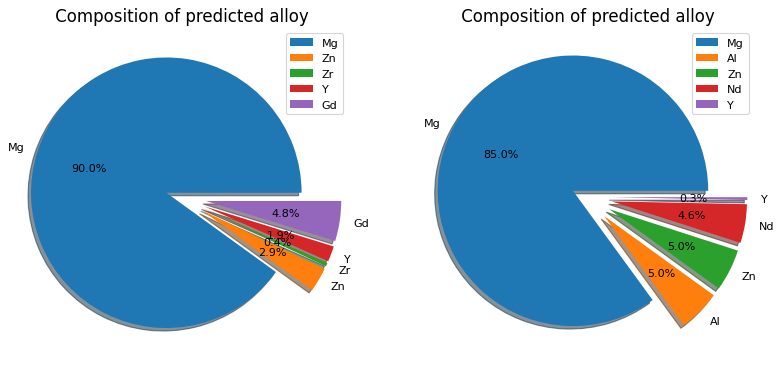

In [192]:
	
#l = [85.829615,	7.871240e-09,	1.145223e-10,	8.300582e-12,	7.065180e-12,	1.062370e-11,	1.638544e-10,	9.284992e-12,	0.000037,	2.192726e-11,	4.147714e-11,	8.265056e-08,	0.350456,	9.195954e-11,	0.001995,	7.054153e-12,	6.914096e-12	,6.706127e-12,	2.655280e-09,	4.734476e-10,	6.755682e-12,	9.990042e-07,	0.000588,	13.817308,	6.658677e-12]
fig, (ax1,ax2) = plt.subplots(1,2 ,figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

values_1 = [90.035535,	2.895519,	0.432177	,	1.85392,	4.782849]
labels_1= ['Mg', 'Zn', 'Zr', 'Y', 'Gd']
explode_1 = [0.1,0.2,0.2,0.2,0.2]

values_2 = [84.944036,	5.000000,	 5.000000	,	4.625776,	0.330188]
labels_2= ['Mg', 'Al', 'Zn', 'Nd', 'Y']
explode_2 = [0.1,0.2,0.2,0.2,0.2]


pie = ax1.pie(values_1, labels=labels_1, explode=explode_1, shadow=True, autopct='%1.1f%%')
ax1.set_title(" Composition of predicted alloy", fontsize = 15)
ax1.legend(pie[0], labels_1, loc="upper corner")

pie_1 = ax2.pie(values_2, labels=labels_2, explode=explode_2, shadow=True, autopct='%1.1f%%')
ax2.set_title(" Composition of predicted alloy", fontsize = 15)
ax2.legend(pie_1[0], labels_2, loc="upper corner")
#plt.savefig(" Pie.png")